## TP Climate Finance

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gurobipy as gp

In [2]:
df_stock=pd.read_excel("Individual_stock_data.xlsx",usecols=['Date','KO'],sheet_name='stock prices')
df_stock=df_stock.set_index('Date')
df_carbonfootprint=pd.read_excel("Individual_stock_data.xlsx",sheet_name='carbon footprint data',skiprows=20,nrows=1,
names=['NAME','SECTOR','SECTOR_NAME','SCOPE1','SCOPE2',
'EMISSIONS','MARKET_VALUE','REVENUES','CARBON_FOOTPRINT','INTENSITY'])
df_sp=pd.read_excel('Individual_stock_data.xlsx',sheet_name='SP500')
df_sp=df_sp.set_index('Name')

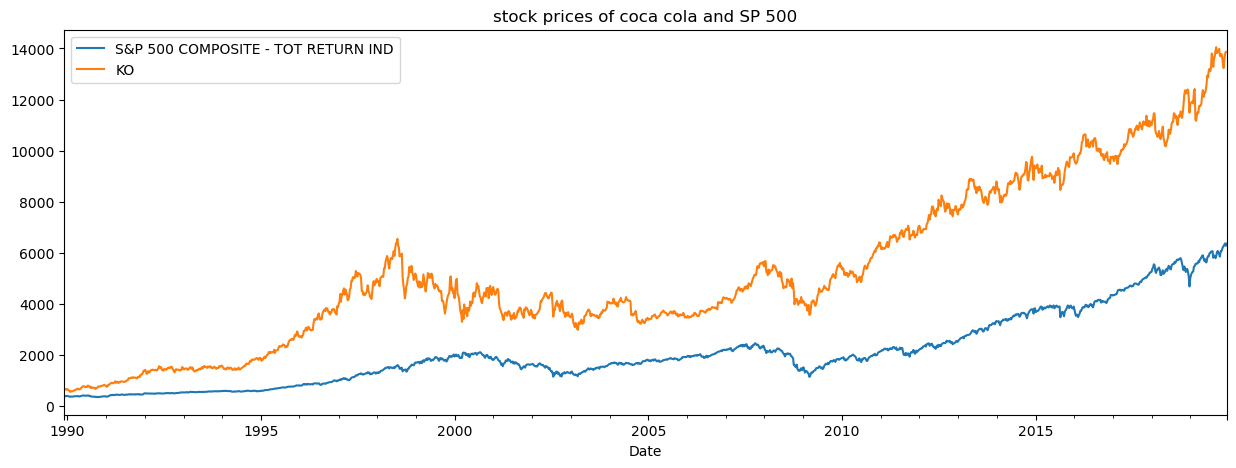

In [3]:
fig,ax=plt.subplots(1,1,figsize=(15,5))
df_sp.plot(ax=ax,title='stock prices of coca cola and SP 500')
df_stock.plot(ax=ax)
plt.show()

Weight search by minimizing tracking error

In [1]:
df_stock.index.day

NameError: name 'df_stock' is not defined

In [62]:
intervalle=df_stock.index[(df_stock.index < '1993-01-01')&(df_stock.index > '1989-12-05')]
T=len(intervalle)
NbT=len(df_stock)/T

In [77]:
(intervalle[0]- pd.Timedelta("7 days")).to_timedelta64()

AttributeError: 'Timestamp' object has no attribute 'to_timedelta64'

In [59]:
model=gp.Model()
w=model.addVars(intervalle,vtype=gp.GRB.CONTINUOUS)

In [75]:
model.setObjective(gp.quicksum(w[t]*df_stock[t]-((df_stock[t]-df_stock[(t- pd.Timedelta("7 days")).to_timedelta64()])/df_stock[t])-df_sp[t] for t in intervalle)/T,gp.GRB.MINIMIZE)


KeyError: Timestamp('1989-12-12 00:00:00')